In [1]:
import numpy as np
import src.solutions.eigenmodes_part1 as eigen_part1
import src.solutions.direct_diffusion as direct_diffusion
import src.solutions.leapfrog as leapfrog
import src.visualizations as vis

In [2]:
N = 5

In [3]:
# initial_matrix = eigen_part1.create_init_matrix_a(N)
# print(initial_matrix)

### Steady State Diffusion with a Direct solver
Uses a dependency matrix incorporating all the dependencies and a b that enforces the boundary conditions and source.  
This is implemented on a circular grid where the edges of the circle are fixed at 0. The grid is solved with different discretization steps. 

c:\Users\chris\Documents\courses\scientific_computing\Projects\Scientific_Computing_3\src\visualizations.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


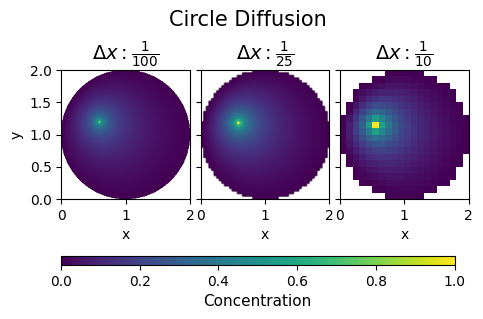

In [4]:
# N = 200
nntjes = [200, 50, 20]
source_location = (0.6, 1.2)
grid_size = 2

# create the grid and plot the converged grid 
converged_grids = direct_diffusion.direct_diffusion(nntjes, source_location, grid_size)
vis.plot_diffusion_circle(converged_grids, nntjes)

max deltax for k: 16 = 0.039999979625056845
max deltax for k: 8 = 0.028284258024895176
max deltax for k: 4 = 0.019999994068552206
max deltax for k: 2 = 0.014142135618269602
max deltax for k: 1 = 0.009999994475991134


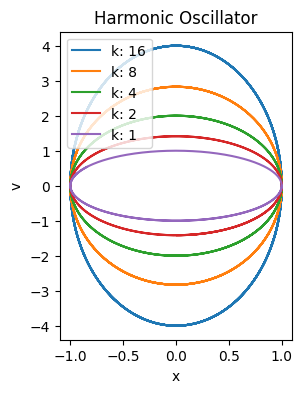

In [2]:
ks = [16, 8, 4, 2, 1]
m=1
x = 1
v_0 = 0
deltat = 0.01
data_per_k = leapfrog.harmonic_oscillator_leapfrog(ks, deltat, x, v_0, m)

vis.vis_harmonic_oscillator(data_per_k)